In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

df = pd.read_csv("hotel_bookings.csv")

df['distribution_channel'] = LabelEncoder().fit_transform(df['distribution_channel'])
df['reserved_room_type'] = LabelEncoder().fit_transform(df['reserved_room_type'])
df['assigned_room_type'] = LabelEncoder().fit_transform(df['assigned_room_type'])

features = [
    "lead_time", "booking_changes", "is_canceled",
    "distribution_channel", "reserved_room_type", "assigned_room_type"
]
df_booking = df[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_booking)

inertias = []
silhouettes = []
k_range = range(2, 15)

df_booking.isnull().sum()

lead_time               0
booking_changes         0
is_canceled             0
distribution_channel    0
reserved_room_type      0
assigned_room_type      0
dtype: int64

In [24]:
for k in k_range:
    model = KMeans(n_clusters=k, random_state=42)
    labels = model.fit_predict(X_scaled)
    inertias.append(model.inertia_)

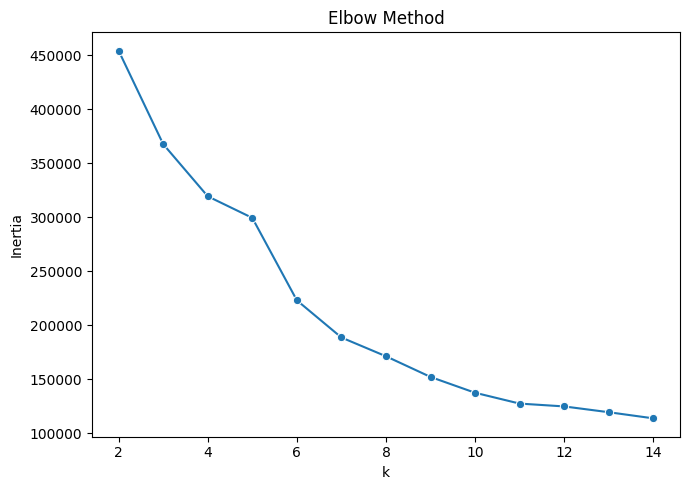


Booking Behavior Cluster Summary:
                          lead_time  booking_changes  is_canceled  \
booking_behavior_segment                                            
0                            169.96             0.03         0.99   
1                            105.88             0.08         1.00   
2                             81.70             0.13         0.00   
3                            117.20             1.64         0.09   
4                             83.23             0.00         0.00   
5                             71.67             0.36         0.22   

                          distribution_channel  reserved_room_type  \
booking_behavior_segment                                             
0                                         3.00                0.01   
1                                         2.99                3.65   
2                                         3.00                3.42   
3                                         2.96                

In [25]:
fig, ax = plt.subplots(figsize=(7, 5))
sns.lineplot(x=list(k_range), y=inertias, marker="o", ax=ax)
ax.set_title("Elbow Method")
ax.set_xlabel("k")
ax.set_ylabel("Inertia")

plt.tight_layout()
plt.show()

optimal_k = 6
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df["booking_behavior_segment"] = kmeans.fit_predict(X_scaled)

cluster_summary = df.groupby("booking_behavior_segment")[features].mean().round(2)
print("\nBooking Behavior Cluster Summary:")
print(cluster_summary)
